In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv("/content/data.xlsx-Sheet1.csv")

The Aspiring Mind Employment Outcome 2015 (AMEO) dataset focuses on employment outcomes for engineering graduates. It includes around 40 independent variables and 3998 data points, covering aspects such as salary, academic performance, college details, and scores in cognitive, technical, and personality skills. The dataset is valuable for exploring the relationships between these variables in the context of engineering disciplines.






In [3]:
data.shape

(3998, 39)

In [4]:
data

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [6]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [8]:
# Replace "-1" with NaN for object columns
data.replace("-1", np.nan, inplace=True)

# Replace -1 with NaN for integer and float columns
data.replace(-1, np.nan, inplace=True)

# Count missing values in each column
missing_values = data.isnull().sum()

# Display the count of missing values
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Unnamed: 0                  0
ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEn

In [9]:
data.isnull().sum().sort_values(ascending=False)

CivilEngg                3956
ElectricalEngg           3837
MechanicalEngg           3763
TelecomEngg              3624
ComputerScience          3096
ElectronicsAndSemicon    2854
ComputerProgramming       868
JobCity                   461
Domain                    246
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Unnamed: 0                  0
CollegeCityTier             0
conscientiousness           0
agreeableness               0
extraversion                0
nueroticism                 0
CollegeState                0
CollegeCityID               0
ID                          0
collegeGPA                  0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board   

In [10]:
data['DOJ'] = pd.to_datetime(data['DOJ'])
data['DOB'] = pd.to_datetime(data['DOB'])
#modified the dataset type form object to datatime

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   float64       
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3537 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [12]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,902.000000,235.000000,161.000000,374.000000,42.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,405.636364,406.876596,433.037267,350.173797,349.666667,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,89.960805,84.894993,98.515537,75.661864,79.784670,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,130.000000,180.000000,206.000000,153.000000,166.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,346.000000,362.000000,366.000000,287.500000,292.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,407.000000,407.000000,433.000000,356.000000,348.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,469.000000,446.000000,500.000000,393.000000,388.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [13]:
data["Salary"].mean() #mean

307699.8499249625

In [14]:
data["Salary"].min() #least salary

35000.0

In [15]:
data["Salary"].max() #highest salary

4000000.0

In [16]:
data["Salary"].quantile(0.25) #percentile

180000.0

In [17]:
data["Salary"].std()  #standard deviation

212737.49995685622

In [18]:
data["Salary"].skew()
#since the value is positive, the data is right skewed

6.451081166224832

In [19]:
data["Salary"].kurt()

80.92999627162538

<Axes: ylabel='Density'>

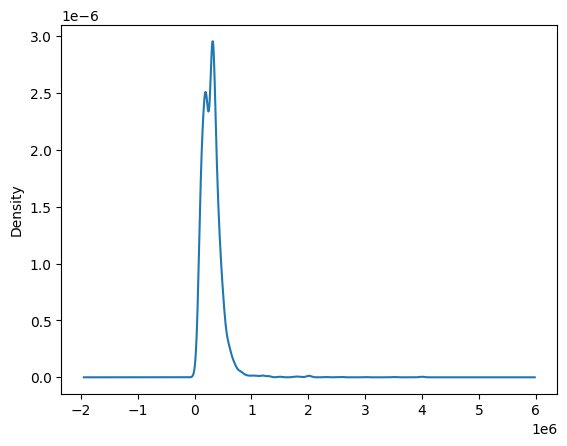

In [20]:
data["Salary"].plot(kind = 'kde')
#double peak and right skewed

<Axes: >

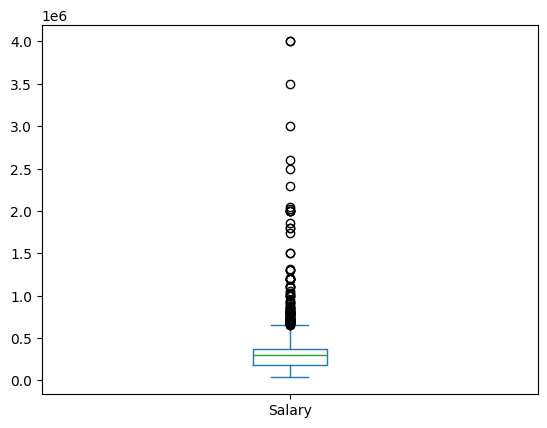

In [21]:
data["Salary"].plot(kind = 'box')

In [22]:
#here there are may outliers in salary which is greater than 500000

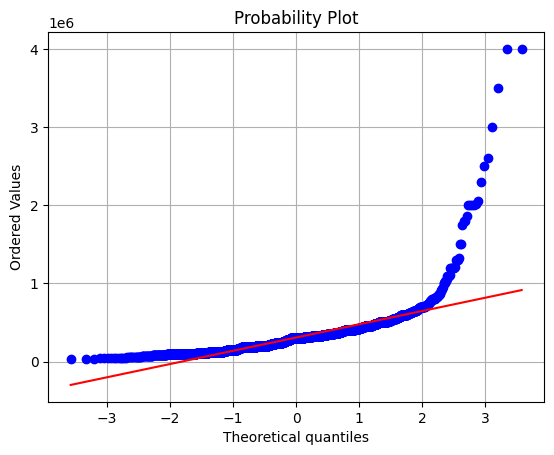

In [23]:
stats.probplot(data['Salary'], dist="norm", plot = plt)
plt.grid()
#here it is not normal distribution

In [24]:
#since graph is not inclined to 45 degrees, so it is not in normal distribution

<Axes: >

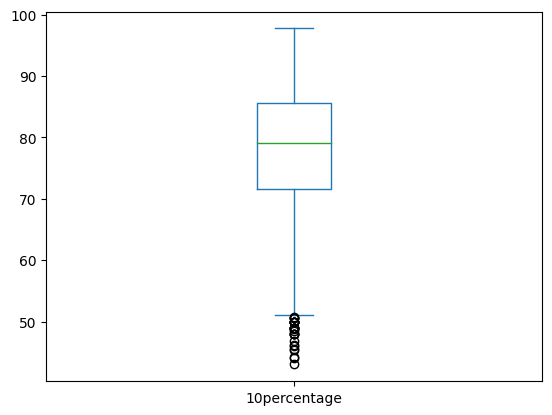

In [25]:
data["10percentage"].plot(kind = 'box')
#in the below graph we can see some out layers who got less than 50% grade in 10th percentage

<Axes: >

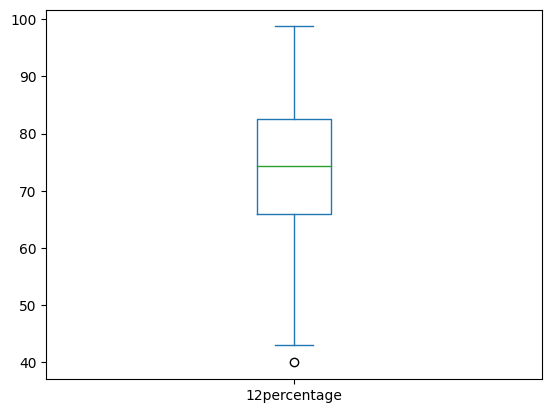

In [26]:
data["12percentage"].plot(kind = 'box')
#not much out layers in this graph

<Axes: >

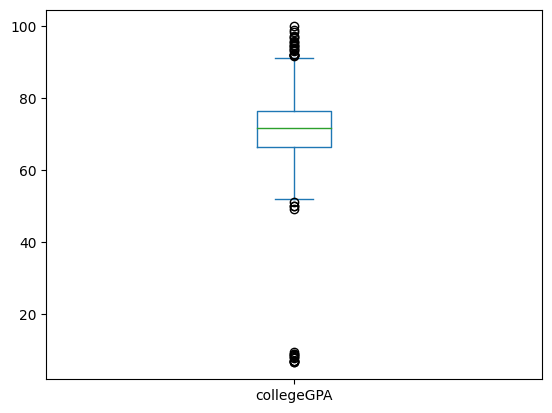

In [27]:
data["collegeGPA"].plot(kind = 'box')
#many out layers in this graph

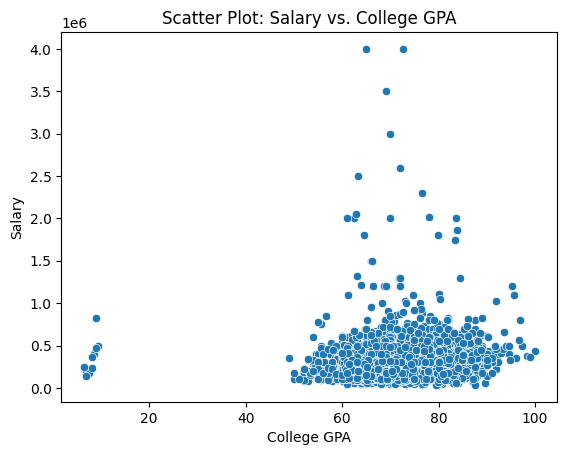

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure
sns.scatterplot(x='collegeGPA', y='Salary', data=data)
plt.title('Scatter Plot: Salary vs. College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

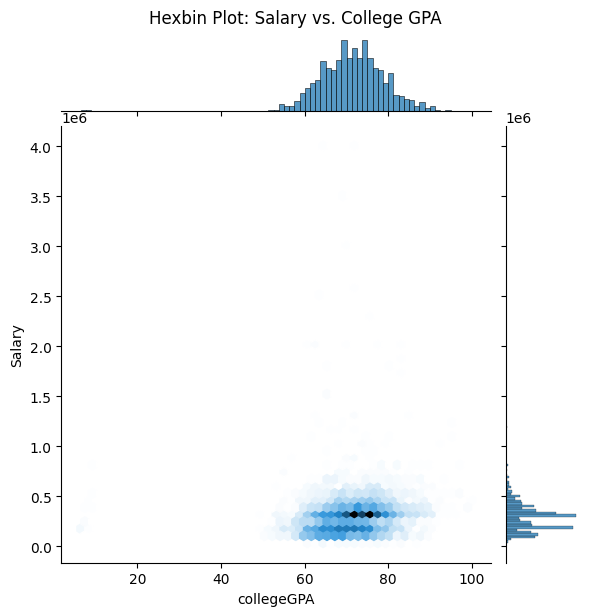

In [29]:
plt.figure
sns.jointplot(x='collegeGPA', y='Salary', kind='hex', data=data)
plt.suptitle('Hexbin Plot: Salary vs. College GPA', y=1.02)
plt.show()

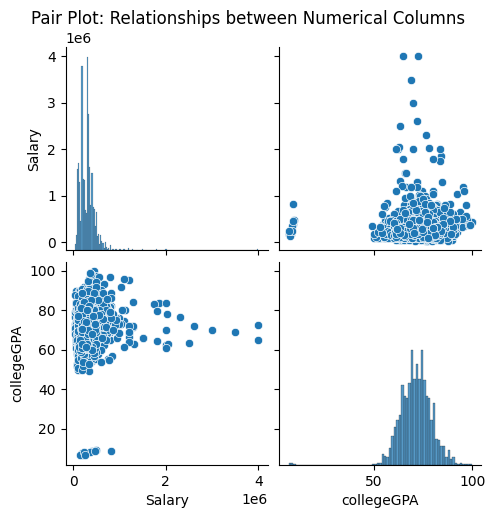

In [30]:
numerical_columns = ['Salary', 'collegeGPA']
sns.pairplot(data[numerical_columns])
plt.suptitle('Pair Plot: Relationships between Numerical Columns', y=1.02)
plt.show()


In [31]:
#from the graphs we can observe that many of the people who got grade between 50 percentage and 100 percentage got a job and
# many of the people have salary between 10000 and 1000000 and we can see very few people who got less than 20 percentage
# grade also got a job with a salary of 30000 to 500000

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 68.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 80.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


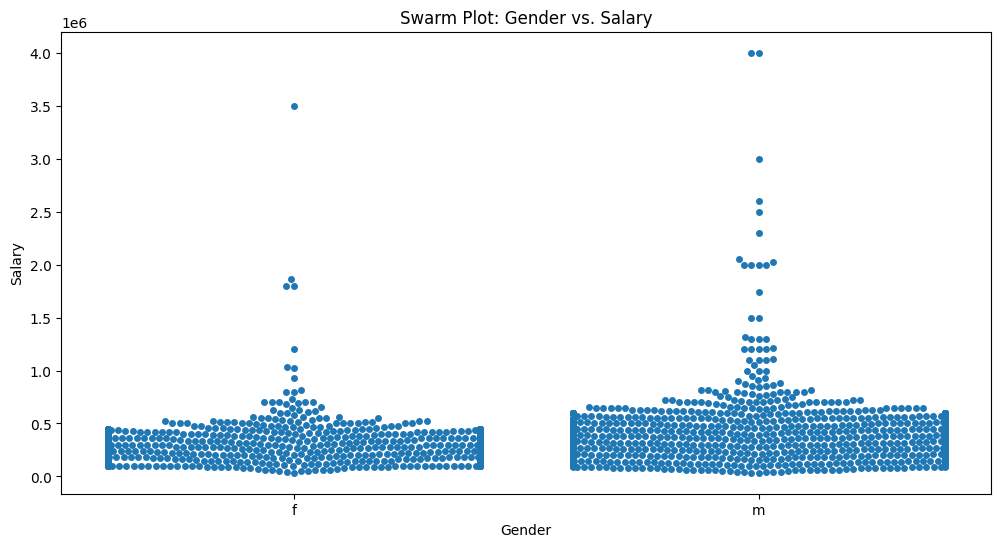

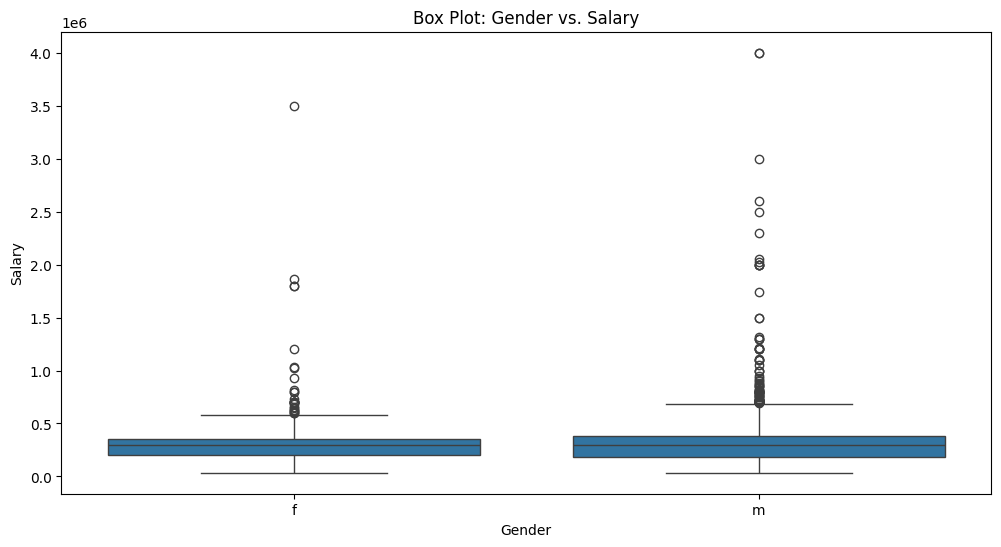

<ipython-input-32-94ca10ab2fe5>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Salary', data=data, ci=None)


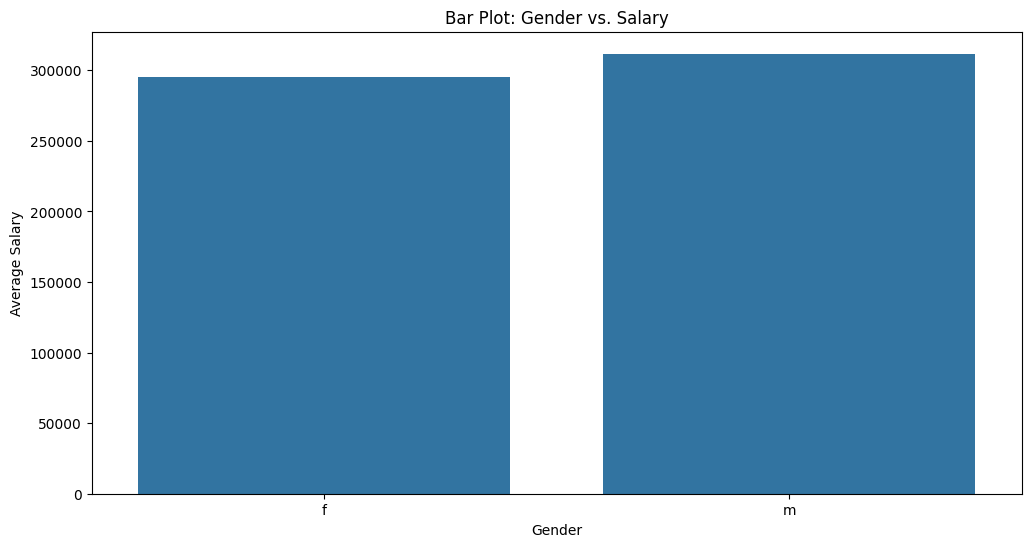

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Gender', y='Salary', data=data)
plt.title('Swarm Plot: Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Box Plot: Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Gender', y='Salary', data=data, ci=None)
plt.title('Bar Plot: Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()


In [33]:
# from the above graphs we can observe that the median of salary of both male and female are almost same.
# there are some outliers in the dataset
# the highest salary of men is around 4000000 and highest salary of female is around 3500000.
# we can observe that the average salary of male is more than the average salary of female

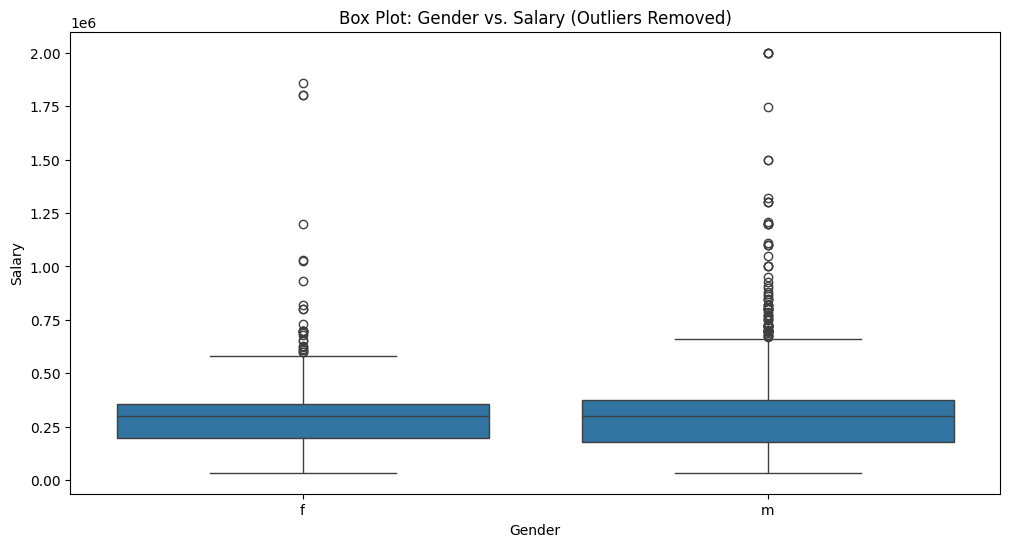

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data to exclude outliers
filtered_data = data[data['Salary'] <= 2000000]

# Box plot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Salary', data=filtered_data)
plt.title('Box Plot: Gender vs. Salary (Outliers Removed)')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()


In [35]:
#in the above graph, even after removing some of the outliers the median of salary of both male and female are almost same

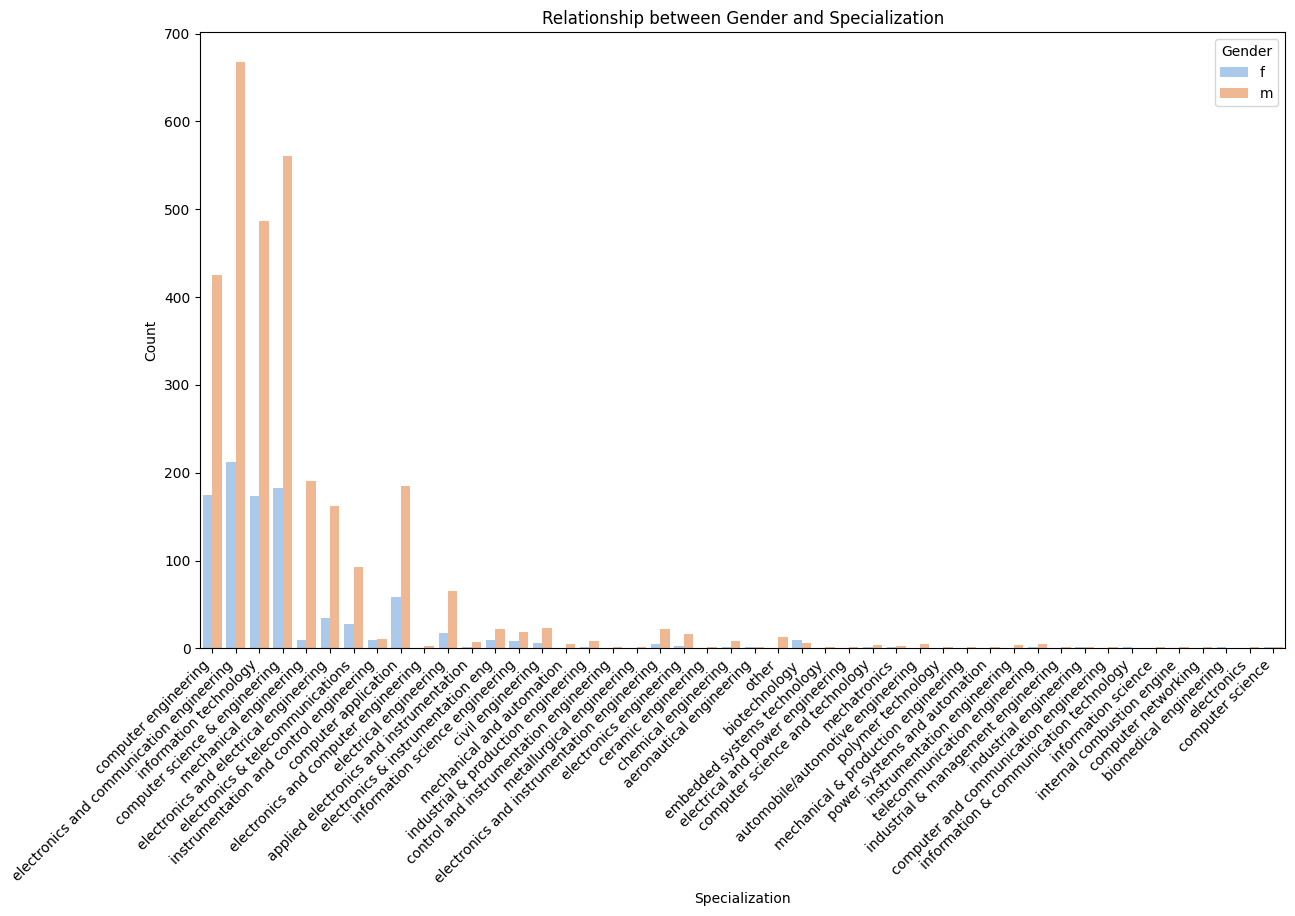

In [36]:
# Stacked Bar Plot
plt.figure(figsize=(14, 8))
sns.countplot(x='Specialization', hue='Gender', data=data, palette='pastel')
plt.title('Relationship between Gender and Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.legend(title='Gender')
plt.show()


In [37]:
#from the bar graph we can observe that majority of the men and women are doing job in role electronics and communication engineering
#count of computer science and engineering in men and women is the second highest among all other branches.

In [38]:
unique_specializations = data['Specialization'].nunique()

print(f"Number of unique specializations: {unique_specializations}")


Number of unique specializations: 46


In [39]:
unique_designations = data['Designation'].unique()

print("Unique Designations:")
print(unique_designations)


Unique Designations:
['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' 'online marketing manager'
 'documentation specialist' 'associate software engineer'
 'management trainee' 'site manager' 'software developer' '.net developer'
 'production engineer' 'jr. software engineer'
 'trainee software developer' 'ui developer' 'assistant system engineer'
 'android developer' 'customer service' 'test engineer' 'java developer'
 'engineer' 'recruit

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [40]:
import pandas as pd

# Assuming 'data' is your DataFrame containing the dataset

# Filter data for Computer Science Engineering graduates and specific job titles
filtered_data = data[(data['Specialization'] == 'computer science & engineering') &
                     (data['Designation'].isin(['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']))]

# Calculate the average salary for each job title
average_salary_by_title = filtered_data.groupby('Designation')['Salary'].mean()

# Display the average salary for each job title
print("Average Salary for each job title:")
print(average_salary_by_title)


Average Salary for each job title:
Designation
associate engineer    332500.000000
programmer analyst    323846.153846
software engineer     332949.640288
Name: Salary, dtype: float64


In [41]:
#you can earn more than 3 lakhs salary as fresh graduate

In [45]:
# Calculate the average salary for each job title
average_salary = filtered_data.mean()

# Display the average salary for each job title
print("Average Salary for  Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer:")
print(average_salary['Salary'])

Average Salary for  Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer:
331526.9461077844


<ipython-input-45-78566c818e3c>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  average_salary = filtered_data.mean()
<ipython-input-45-78566c818e3c>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_salary = filtered_data.mean()
